# General Camera Model in Computer Vison
<div style="text-align:right;">Oct. 23th 2022</div>
<div style="text-align:right;">Shinichiro Sonoda</div>

## 1. Pinhole Camera Model <sup>1)

The following is an excerpt from the reference material<sup> 1) </sup>and some notation corrections.  

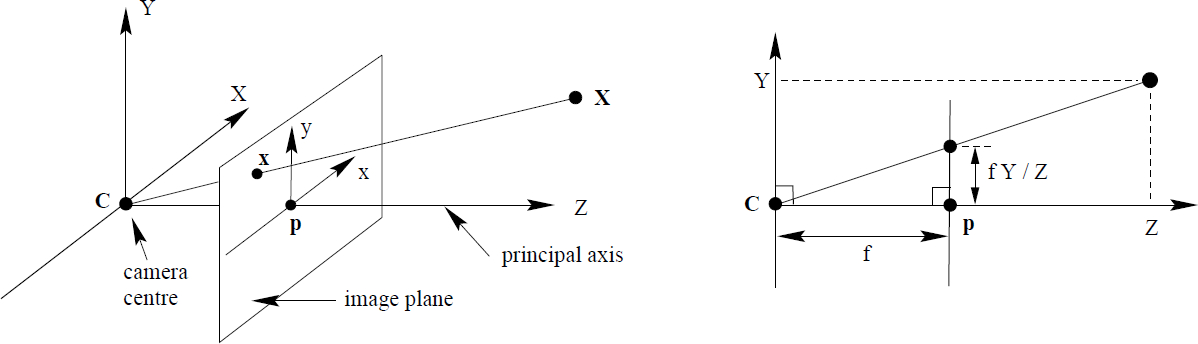

In [1]:
from IPython.display import Image
Image("./png/Pinhole_camera1.png")

Figure 1. Pinhole camera geometry. The centre of projection is called the camera centre or the optical centre. The line from the camera centre perpendicular to the image plane is called the principal axis or principal ray. The point where the principal axis meets the image plane is called the principal point. The plane through the camera centre parallel to the image plane is called the principal plane of the camera. C is the camera centre and p the principal point. The camera centre is here placed at the coordinate origin [Hartley and Zisserman, 2003]<sup>2).

Let the centre of projection be the origin of a Euclidean coordinate system, and the plane   Z=f, which is called the image plane or focal plane. Under pinhole camera model, a point in space with coordinates  $(X, Y, Z)^T$ is mapped to the point on the image plane $(\frac{fX}{Z}, \frac{fY}{Z}, f)^T$ using triangles as shown in Figure 1  

$
(X, Y, Z)^T\longrightarrow(\frac{fX}{Z},\frac{fY}{Z})^T 
    \label{mapping}
    \tag{1}
$

Central projection can simply expressed as a linear mapping between their homogeneous coordinates in terms of matrix multiplication by,  
$
% <![CDATA[
\begin{bmatrix}
		fX\\fY\\Z\\
		\end{bmatrix}=		
		\begin{bmatrix}
		f&0&0&0\\0&f&0&0\\0&0&1&0\\		
		\end{bmatrix}
		\begin{bmatrix}
		X_{cam}\\Y_{cam}\\Z_{cam}\\1\\
		\end{bmatrix}
    \label{eq:k1}
    \tag{2} %]]>
$

Principal point offset: In theory the origin of coordinates in the image plane assumed to be at the principal point. This may not be true in practice, hence, the Eq. (2)  is express as,
$
% <![CDATA[
\begin{bmatrix}
	fX+ Zp_x\\fY+ Zp_y\\~Z\\		
	\end{bmatrix}=
	\begin{bmatrix}
	f_x&0&p_x&0\\0&f_y&p_y&0\\0&0&1&0\\		
	\end{bmatrix}
	\begin{bmatrix}
	X_{cam}\\Y_{cam}\\Z_{cam}\\1\\
	\end{bmatrix}
	\label{eq:k2}
  \tag{3} %]]>
$

First matrix in the right side of Eq. (3)  called camera calibration matrix, usually expressed by K. For added generality, the calibration matrix can be express as,
$
% <![CDATA[
K=
		\begin{bmatrix}
		\alpha_x&s&p_x\\0&\alpha_y&p_y\\0&0&1\\		
		\end{bmatrix}
		\label{eq:K}
    \tag{4} %]]>
$
where  s  is referred to as the skew parameter which is zero for most of the cameras.   $f_x$  and  $f_y$  where $\alpha_x=f_x$ and $\alpha_y=f_y$ represent the focal length of the camera in terms of pixel dimensions in the x-axis and the y-axis respectively, and  ($p_x$,$p_y$)  is coordinate of the principal point.

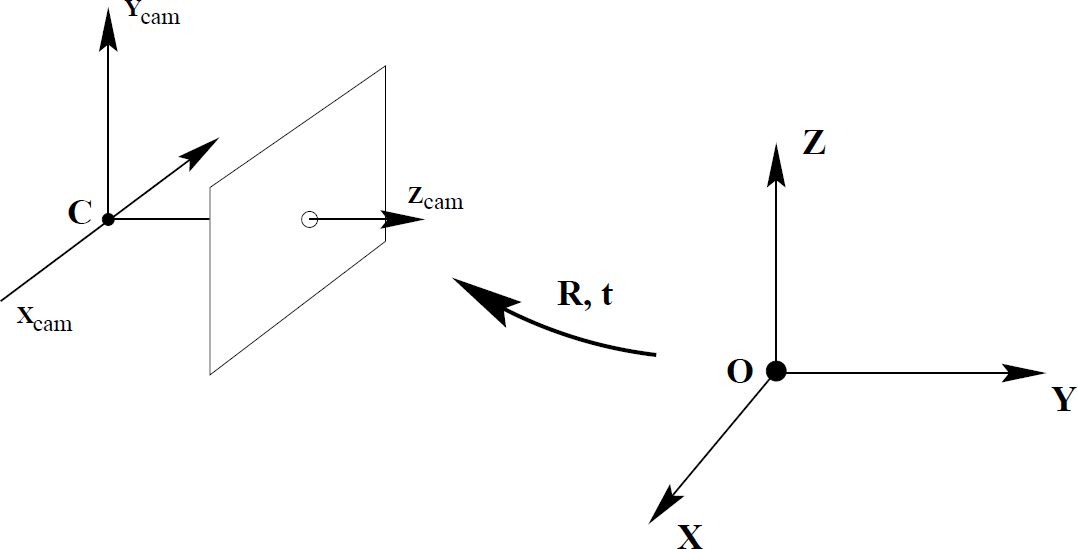

In [2]:
Image("./png/Pinhole_camera2.png")

Figure 2: The Euclidean transformation between the world and camera coordinate frames [Hartley and Zisserman, 2003].

The camera coordinate and world coordinate frames are related by rotation and translation. As it is shown in Figure 2, if  $\textbf{X}=(X,Y,Z,1)^T$  is the coordinate of the point in the world coordinates, then $\textbf{X}_{cam}$ is transformed by,  
$
\textbf{X}_{cam}=\big[R\quad t\big]\textbf{X}
	 \label{eq:world2cam}
    \tag{5}
$
So that, the general pinhole camera matrix, P, can be represented by,  
$
% <![CDATA[
\textbf{P}=\textbf{K}\big[\textbf{R}\quad \textbf{t}\big]=
	 \begin{bmatrix}
	 f_x&0&p_x\\0&f_y&p_y\\0&0&1\\		
	 \end{bmatrix}
	 \begin{bmatrix}
	 	 r_1&r_2&r_3&t_1\\r_4&r_5&r_6&t_2\\r_7&r_8&r_8&t_3\\		
	 \end{bmatrix}
	 \label{eq:p}
   \tag{6} %]]>
$

<p><strong>Internal camera parameters, K ,</strong> show the internal orientation of the camera and it is fixed.</p>

<p><strong>External parameters, R and t</strong> show camera orientation and position to a world coordinate system.</p>

回転行列$\textbf{R}$はロドリゲス行列式で記載できる。
ロドリゲス行列については以下のURLを参照  
https://w3e.kanazawa-it.ac.jp/math/physics/category/physical_math/linear_algebra/henkan-tex.cgi?target=/math/physics/category/physical_math/linear_algebra/rodrigues_rotation_formula.html  
$x$軸回りの$\theta_x$回転させる行列を$\textbf{R_x}(\theta_x)$  
$y$軸回りの$\theta_y$回転させる行列を$\textbf{R_y}(\theta_y)$  
$z$軸回りの$\theta_z$回転させる行列を$\textbf{R_y}(\theta_y))$  
とすると、$\textbf{R} = \textbf{R_x}(\theta_x) \textbf{R_y}(\theta_y) \textbf{R_y}(\theta_y)$と表すことができる。

## 2. QR分解<sup> 3) 4) 

### カメラ行列Pからキャリブレーション行列K、回転行列R、並進ベクトルtを求める方法

$\textbf{P}=
\left(
\begin{array}{rr}
	 P_{11}&P_{12}&P_{13}&P_{14}\\
     P_{21}&P_{22}&P_{23}&P_{24}\\
     P_{31}&P_{32}&P_{33}&P_{34}\\	
\end{array}
\right)
\tag{7}$

とすると、

$
\left(
\begin{array}{rr}
	 P_{11}&P_{12}&P_{13}\\
     P_{21}&P_{22}&P_{23}\\
     P_{31}&P_{32}&P_{33}\\
\end{array}
\right)=
\left(
\begin{array}{rr}
	 f_x&0&P_x\\
     0&f_y&P_y\\
     0&0&1\\
\end{array}
\right)
\left(
\begin{array}{rr}
	 r_{11}&r_{12}&r_{13}\\
     r_{21}&r_{22}&r_{23}\\
     r_{31}&r_{32}&r_{33}\\
\end{array}
\right)
\tag{8}
$

となる。  
$\textbf{K}$行列は、三角行列になっている。  
また$\textbf{R}$行列は回転行列であるので、直交正規行列となる。  
このような行列積はQR分解でそれぞれの行列に分解することができる。

カメラ行列$\textbf{P}$がわかるとQR分解で$\textbf{K}$及び$\textbf{R}$が求まる。  
求められた$\textbf{K}$を用いて以下の関係から$\textbf{t}$を求めることができる。

$
\left(
\begin{array}{rr}
	 P_{14}\\
     P_{24}\\
     P_{34}\\
\end{array}
\right)
=
\left(
\begin{array}{rr}
	 f_x&0&P_x\\
     0&f_y&P_y\\
     0&0&1\\
\end{array}
\right)
\left(
\begin{array}{rr}
	 t_1\\
     t_2\\
     t_3\\
\end{array}
\right)
\tag{9}
$

$
\textbf{t}=
\textbf{k}^{-1}
\left(
\begin{array}{rr}
	 P_{14}\\
     P_{24}\\
     P_{34}\\
\end{array}
\right)
\tag{10}
$

## 3. カメラ中心の求め方<sup> 3)

カメラ中心$\textbf{C}$は、$\textbf{PC} = 0$となるため、   
$\textbf{KRC} + \textbf{Kt} = 0$より  
$\textbf{C} = -\textbf{R}^T \textbf{t}$  
となる。

## 4. テストプログラム<sup> 3)

In [3]:
from scipy import linalg
import numpy as np

class Camera(object):
    # Pinhole Camera Class
    def __init__(self, P):
        # Camera Matrix P is initialized
        self.P = P
        self.K = None # Caliblation Matrix
        self.R = None # Rotation Matrix
        self.t = None # Translation Vector
        self.c = None # Center of Camera
        
    def project(self, X):
        # pjoject the points in X normalize the coordinates
        x = np.dot(self.P, X)
        for i in range(3):
            x[i] /= x[2]
        
        return x
    
    def Rodrigues(self, u, th):
        # Matrix R of u-axis θ rotation (Rodrigues rotation formula)
        def vec2skew(v):
            # v∈R^3-->v_×(Matrix of outer product action)
            v = v.reshape([3,])
            return np.array([[0,-v[2],v[1]], [v[2],0,-v[0]], [-v[1],v[0],0]])
        
        u = u.reshape([3, 1])
        R = np.eye(4)
        R[:3, :3] = np.cos(th)*np.eye(3) + np.sin(th)*vec2skew(u) + (1-np.cos(th))*u@u.T
        
        return R
        
    def factor(self):
        # KR is obtained by QR decomposition
        K, R = linalg.rq(self.P[:, :3])
        
        # Refine the diagonal of K
        T = np.diag(np.sign(np.diag(K)))
        
        self.K = np.dot(K, T)
        self.R = np.dot(T, R)
        self.t = np.dot(linalg.inv(self.K), self.P[:, 3])
        
        return self.K, self.R, self.t
    
    def center(self):
        # return the center of the camera
        if self.c is not None:
            return self.c
        else:
            self.factor()
            self.c = -np.dot(self.R.T, self.t)
            return self.c

In [4]:
P = np.array([[100.0,0,0,0],[0,100.0,0,0],[0,0,1.0,0]])
cam = Camera(P)
X = np.array([[[0.5],[0],[1],[1]],
              [[0],[1.0],[1],[1]],
              [[-1.5],[0],[1],[1]],
              [[0],[-2],[1],[1]]])
x = cam.project(X)

### (1) 青、赤、緑、黒の点群をカメラで観測する。

(-300.0, 300.0)

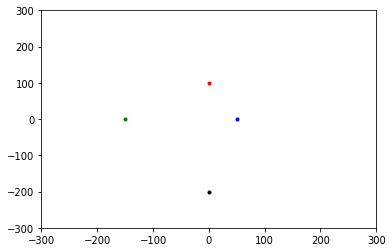

In [5]:
import matplotlib.pyplot as plt

def point_plot():
    c_list = ['b.', 'r.', 'g.', 'k.']
    for i, c in enumerate(c_list):
        plt.plot(x[0][i], x[1][i], c)

point_plot()
plt.xlim(-300, 300)
plt.ylim(-300, 300)   

### (2) Z軸の回りに10度づつ回転させた点群を生成する。

In [6]:
u = np.array([[0,0,1]])
#u = np.array([[0.1,0.1,1]])

u = u / np.linalg.norm(u)
th = np.deg2rad(10)
rot = cam.Rodrigues(u, th)

(-300.0, 300.0)

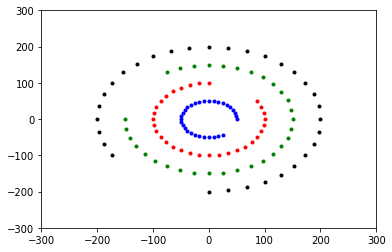

In [7]:
for _t in range(31):
    point_plot()
    cam.P = np.dot(cam.P, rot)
    x = cam.project(X)
    
plt.xlim(-300, 300)
plt.ylim(-300, 300)   

### (3) $\textbf{K}$, $\textbf{[R t]}$から$\textbf{P}$を求める。

In [8]:
K = np.array([[100.0,0,500.0],[0,1000.0,300.0],[0,0,1.0]])
u = np.array([[0,0,1]])
th = np.deg2rad(10)
tmp = cam.Rodrigues(u, th)[:3, :3]
Rt = np.hstack((tmp, np.array([[50.0],[40.0],[30.0]])))
P = np.dot(K, Rt)
cam = Camera(P)

In [9]:
print(K)

[[ 100.    0.  500.]
 [   0. 1000.  300.]
 [   0.    0.    1.]]


In [10]:
print(Rt)

[[ 0.98480775 -0.17364818  0.         50.        ]
 [ 0.17364818  0.98480775  0.         40.        ]
 [ 0.          0.          1.         30.        ]]


### (4) $\textbf{P}$から$\textbf{K}$, $\textbf{[R t]}$を求める。

In [11]:
K, R, t = cam.factor()
Rt = np.hstack((R, t.reshape(3,1)))

In [12]:
K

array([[ 100.,    0.,  500.],
       [   0., 1000.,  300.],
       [   0.,    0.,    1.]])

In [13]:
Rt

array([[ 0.98480775, -0.17364818,  0.        , 50.        ],
       [ 0.17364818,  0.98480775,  0.        , 40.        ],
       [ 0.        ,  0.        ,  1.        , 30.        ]])

$\textbf{K}$, $\textbf{[R t]}$はほぼ一致した。  
→ QR分解で$\textbf{K}$, $\textbf{R}$, $\textbf{t}$を求めることができた。

### (5) カメラ中心を求める。

In [14]:
K = np.array([[100.0,0,500.0],[0,1000.0,300.0],[0,0,1.0]])
tmp = np.eye(3)
Rt = np.hstack((tmp, np.array([[50.0],[40.0],[30.0]])))
P = np.dot(K, Rt)
cam = Camera(P)

cam.center()

array([-50., -40., -30.])

<h2 id="references">References</h2>

1) https://hedivision.github.io/Pinhole.html

<p><a name="ref2"></a> 2) Richard Hartley and Andrew Zisserman. Multiple view geometry in computer
vision. Cambridge university press, 2003.</p>
<p><a name="ref3"></a> 3) 実践　コンピュータビジョン　オライリージャパン</p>

4) https://www.youtube.com/watch?v=2XM2Rb2pfyQ